In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.decomposition import PCA

In [103]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
data = []
data_red = []
data_green = []
data_blue = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        try:
            image = cv.imread(os.path.join(dirname, filename), cv.IMREAD_COLOR)
            image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
            image = cv.resize(image,(340,340))
            red,green,blue = cv.split(image)
            image = image.flatten()
            red = red.flatten()
            green = green.flatten()
            blue = blue.flatten()
            data.append(image)
            data_red.append(red)
            data_green.append(green)
            data_blue.append(blue)
        except:
            print("Empty File!!!")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Empty File!!!
Empty File!!!


In [104]:
df =pd.DataFrame(data)
dfr =pd.DataFrame(data_red)
dfg =pd.DataFrame(data_green)
dfb =pd.DataFrame(data_blue)
df

,0,1,2,3,4,5,6,7,8,9,...,346790,346791,346792,346793,346794,346795,346796,346797,346798,346799
0,-113,84,77,-114,84,77,-117,83,75,-120,...,54,68,94,53,66,92,51,66,92,51
1,83,107,63,82,107,63,80,105,62,78,...,45,55,94,42,46,86,39,45,85,38
2,59,89,54,59,89,53,57,88,51,56,...,65,67,93,63,64,91,60,64,91,60
3,53,76,55,53,76,55,53,76,55,53,...,47,50,77,46,48,74,44,48,74,44
4,65,83,48,65,83,48,68,85,52,71,...,41,57,75,41,58,76,42,58,76,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,37,91,33,37,90,33,36,88,32,35,...,-113,-92,-44,-120,-96,-47,-126,-97,-47,-127
809,-31,-1,-107,-32,-1,-108,-37,-2,-113,-42,...,64,64,121,63,65,121,62,65,121,62
810,31,52,18,31,52,18,33,53,19,34,...,55,79,101,54,77,98,53,77,98,53
811,5,5,4,5,5,4,5,5,4,5,...,5,7,7,7,8,8,8,9,9,9


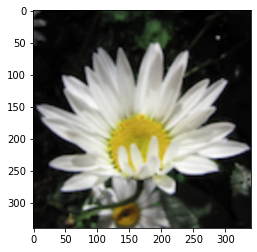

In [105]:
plt.imshow(data[60].reshape([340,340,3]))
# np.shape(data)
# data2 = np.reshape(data,(346800,3612))
# np.shape(data2)

In [119]:
# np.seterr(invalid='ignore')
pca_orig_dims = PCA(400)

data_comp_r = pca_orig_dims.fit_transform(dfr)
data_recov_r = pca_orig_dims.inverse_transform(data_comp_r)

data_comp_g = pca_orig_dims.fit_transform(dfg)
data_recov_g = pca_orig_dims.inverse_transform(data_comp_g)

data_comp_b = pca_orig_dims.fit_transform(dfb)
data_recov_b = pca_orig_dims.inverse_transform(data_comp_b)

# plt.grid()
# plt.plot(pca_orig_dims.explained_variance_ratio_ * 100,(1,814))
# plt.xlabel('Number of components')
# plt.ylabel('Explained variance')
# plt.savefig('Scree plot.png')

In [120]:
img_compressed = (np.dstack((data_recov_r, data_recov_g, data_recov_b))).astype(np.uint8)

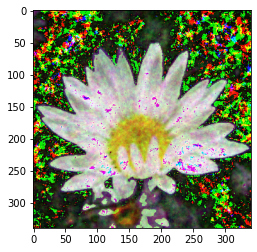

In [122]:
plt.imshow(img_compressed[60].reshape([340,340,3]))